# **Problem statement**


A new rental bike startup wants to establish there rental business. There is a need to know how much bike is needed for rent at any given hour and present and future date. To know the bike should be available on time and to know how much bike a business should have, it needs an analysis of different variable to predict bike count.



### **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:
1. Date: The year-month-day when the data was recorded.

2. Temperature: The temperature in degrees Celsius at the specified hour.

3. Humidity: The percentage of humidity in the air at the specified hour.

4. Windspeed: The windspeed in meters per second at the specified hour.

5. Visibility: The visibility distance in units of 10 meters at the specified hour.

6. Dew Point Temperature: The temperature in degrees Celsius at which air becomes saturated and water vapor begins to condense into dew.

7. Solar Radiation: The amount of solar energy received in megajoules per square meter.

8. Rainfall: The amount of rain received in millimeters.

9. Snowfall: The amount of snow received in centimeters.

10. Seasons: The season during which the data was recorded (Winter, Spring, Summer, or Autumn).

11. Holiday: Indicates whether the specified day was a holiday or not (Holiday/No holiday).

12. Functional Day: Indicates whether the specified hour was a functional hour (Fun) or a non-functional hour (NoFunc).

13. Hour: The hour of the day when the data was recorded.

14. `Rented Bike Count`: **The number of bikes rented at each hour.(Dependent Variable/target)**


In [1]:
# Importing required libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization

In [2]:
# Load Dataset from my github account
data = 'https://raw.githubusercontent.com/hamant-jagwan/Bike_Sharing_Demand_Prediction--ML-regression/main/Bike_Sharing_demand_prediction.csv'
bike_df = pd.read_csv(data, encoding= 'ISO-8859-1')

In [3]:
# First 10 observation
bike_df.head(5)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Last 10 observations
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


## **Data Inspection**

In [5]:
# rearranging the dataset column order
bike_df= bike_df[['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count']]

In [6]:
bike_df.head(5)

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [7]:
# Checking shape of the dataset
bike_df.shape

(8760, 14)

In [8]:
# Checking columns name of dataset
bike_df.columns

Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')

In [9]:
# Basic information of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Rented Bike Count          8760 non-null   int64

***Side Note***

In Pandas, the dtype (short for data type) attribute of a DataFrame or Series indicates the data type of the values. Here are some common dtype types you'll encounter:

1. **int64**: Integer numbers

2. **float64**: Floating-point numbers

3. **object**: General-purpose data type (commonly used for strings)

4. bool: Boolean values (True/False)

5. category: Categorical data

6. datetime64[ns]: Date and time values

7. timedelta[ns]: Difference between dates and times

8. complex: Complex numbers

9. uint8, uint16, uint32, uint64: Unsigned integer types with varying bit widths

10. int8, int16, int32, int64: Signed integer types with varying bit widths

11. float16, float32, float64: Floating-point types with varying precision

12. period: Time periods

In [10]:
# Description of Dataset
bike_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,30/11/2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0
Snowfall (cm),8760.0,NaN,NaN,NaN,0.075068,0.436746,0.0,0.0,0.0,0.0,8.8


# **Exploratory data analysis**

### **Handling Duplicate Values**

In [11]:
# Checking for number of duplicated values
count_duplicated = bike_df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [12]:
# Checking for number of null values
count_null=pd.DataFrame(bike_df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
count_null


,number_of_nulls_values
Date,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0
Snowfall (cm),0


Dataset having 0 null values.



### **Categorial Variables**

In [13]:
# Find categorical variables
bike_df['Date'] = bike_df['Date'].astype('datetime64[ns]')
# Changing the data type of 'Date' columns

categorical_variables = [var for var in bike_df.columns if bike_df[var].dtype=='O']
# extracts the names of columns in bike_df that contain categorical variables

print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*20)
print(categorical_variables)


There are 3 categorical variables
----------------------------------------
['Seasons', 'Holiday', 'Functioning Day']


In [14]:
# Checking number of categories in each categorical variables
categorical_variables_df = bike_df[categorical_variables]
for i in categorical_variables_df.columns:
    print(categorical_variables_df[i].value_counts())
    print('--'*20)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------


There are three categorical variables: "Seasons," "Holidays," and "Functioning Day."

### **Numerical variables**

In [15]:
numerical_variables = [ var for var in bike_df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*20)
print(numerical_variables)

There are 11 numerical variables
----------------------------------------
['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']


Date, Hour, Temperature (°C),Humidity (%), Wind speed (m/s), Visibility (10 m), Dew point temperature (°C), Solar Radiation (MJ/m2),Rainfall (mm) ,Snowfall (cm) and   Rented Bike Countare total 11 numerical variables.



____________________________________________________________________________________________________


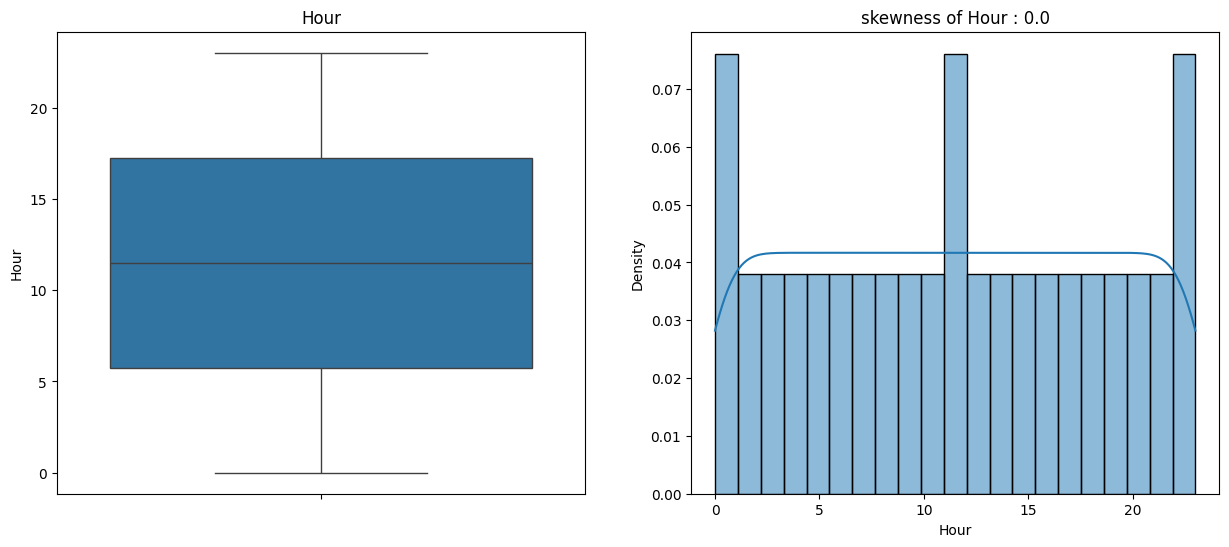

____________________________________________________________________________________________________


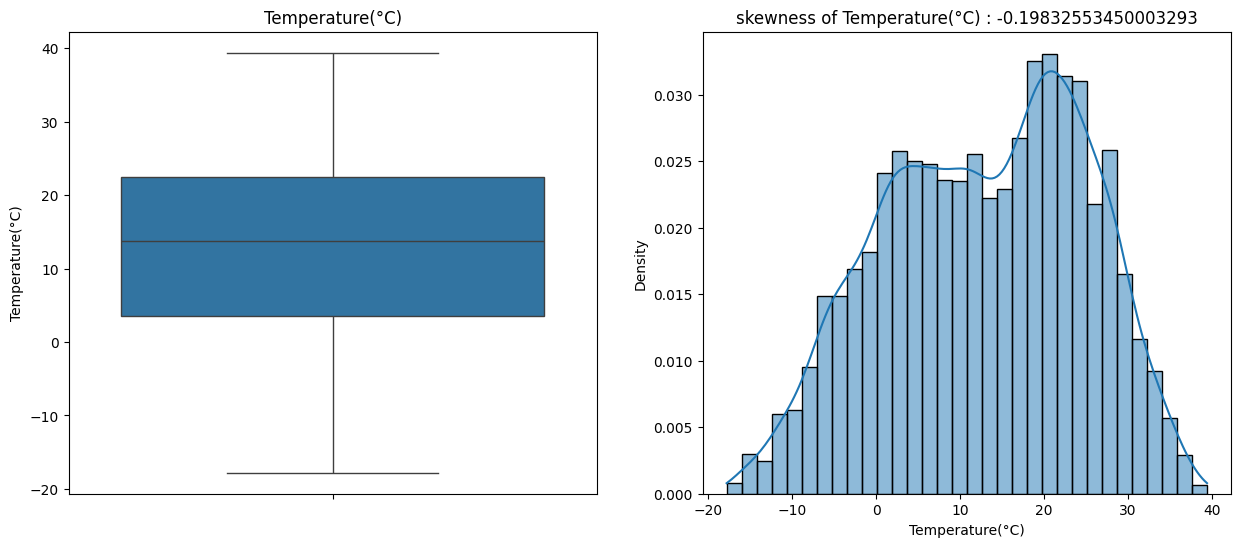

____________________________________________________________________________________________________


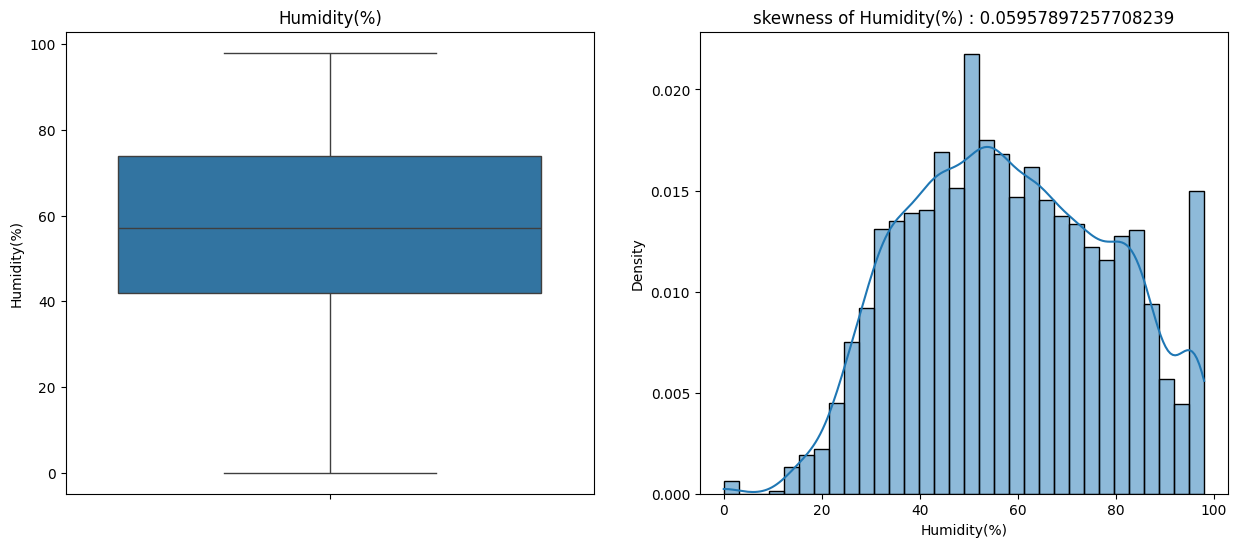

____________________________________________________________________________________________________


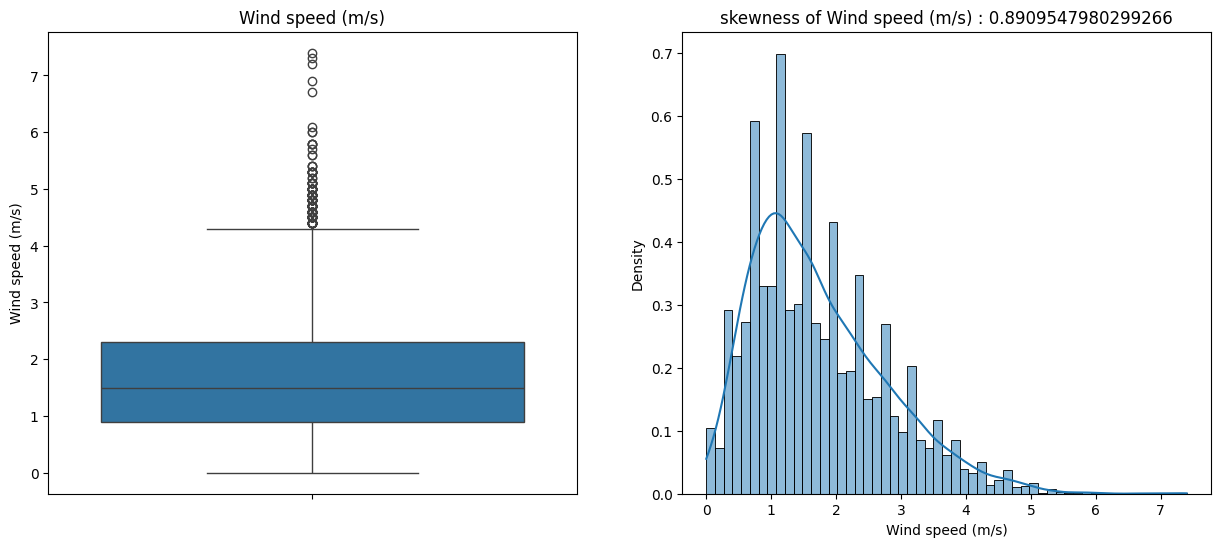

____________________________________________________________________________________________________


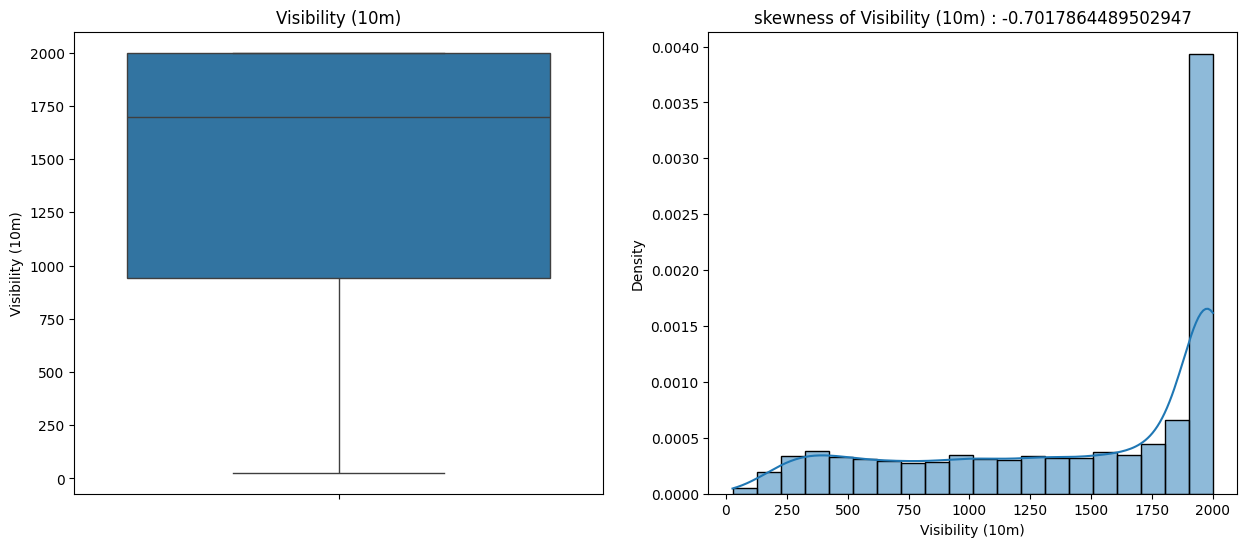

____________________________________________________________________________________________________


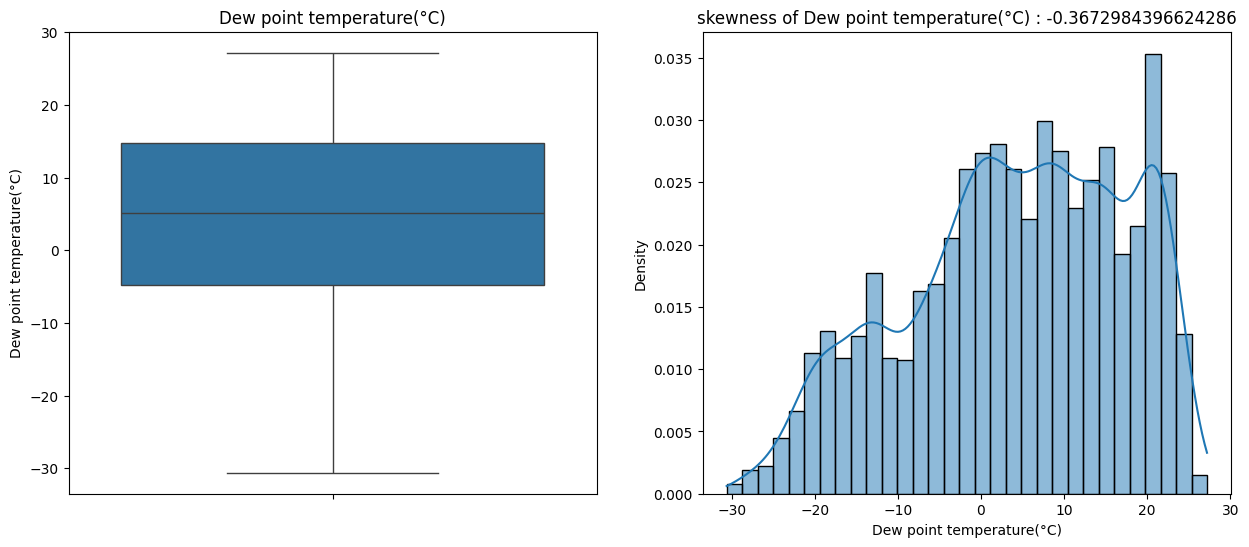

____________________________________________________________________________________________________


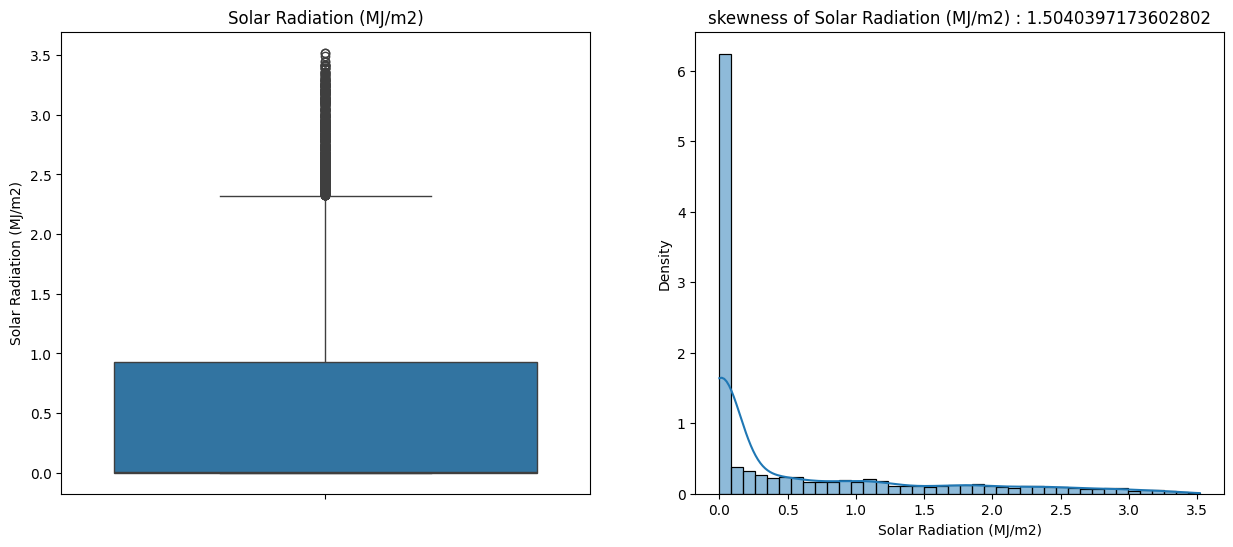

____________________________________________________________________________________________________


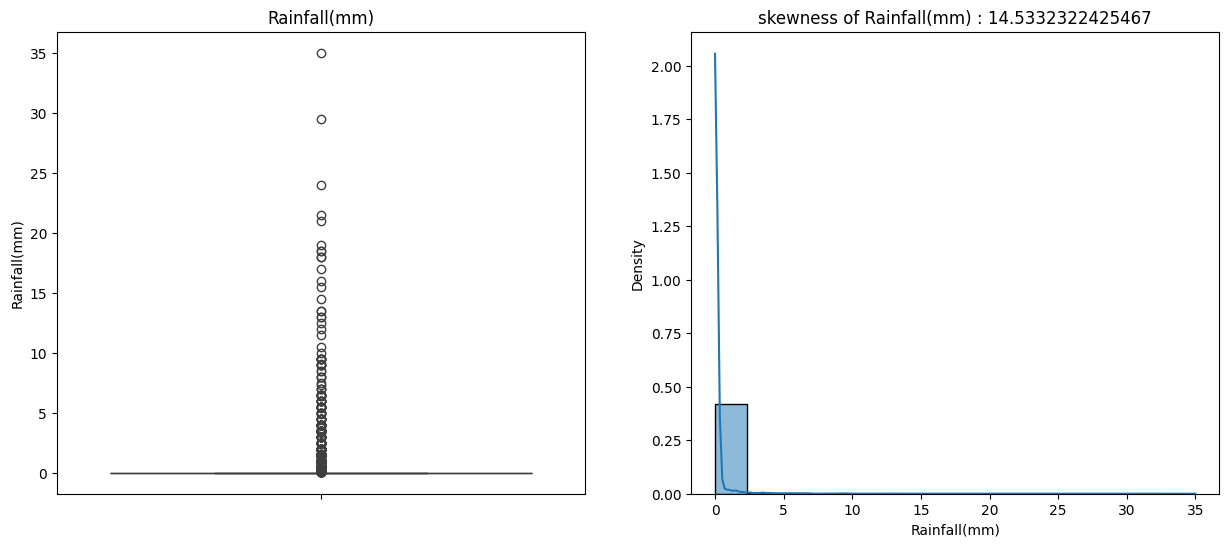

____________________________________________________________________________________________________


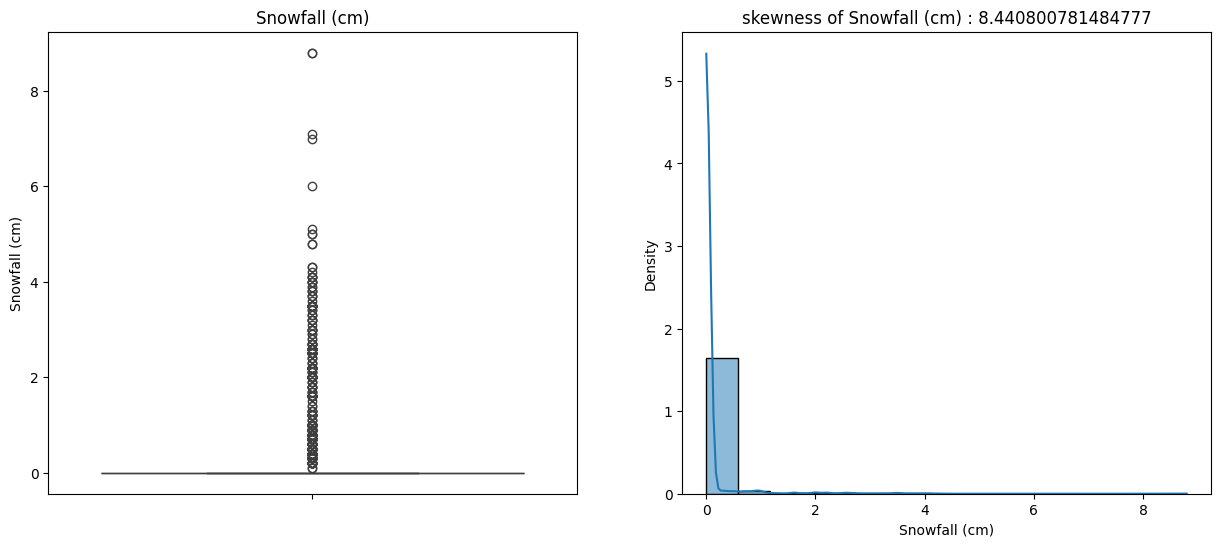

____________________________________________________________________________________________________


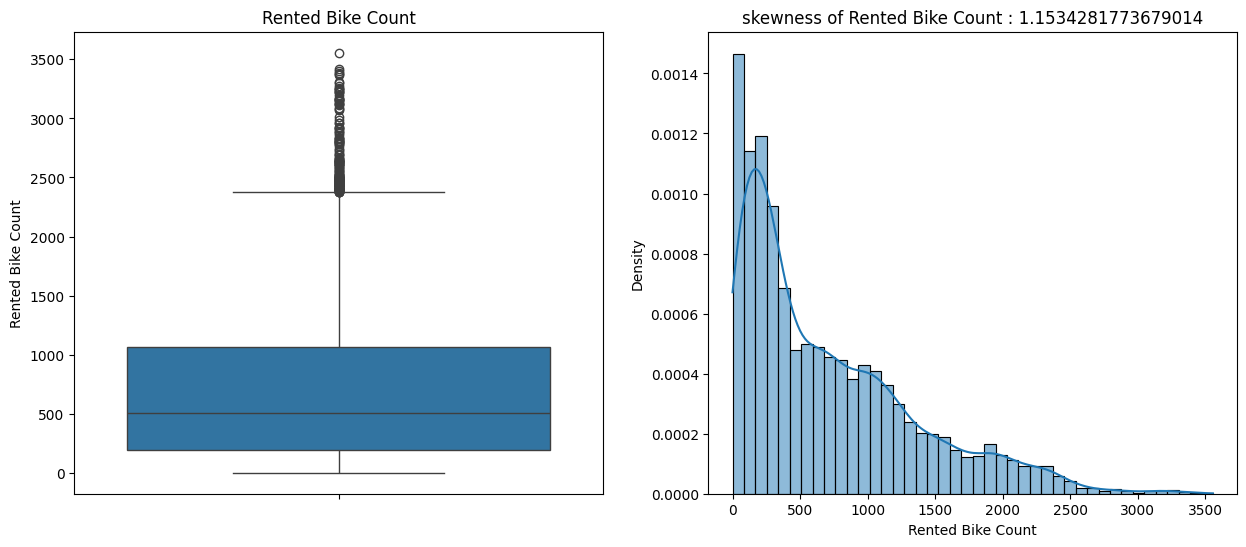

In [16]:
# making the seprate numerical dataset through above information
numerical_variables_df= bike_df[numerical_variables]


# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1) # plt.subplot(nrows, ncols, index)
    ax=sns.boxplot(data=bike_df[var])
    # This creates a boxplot using the data from the bike_df DataFrame for the current variable var.
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.histplot(bike_df[var], kde=True, stat = "density")
    # This creates a distribution plot using the data from the bike_df DataFrame for the current variable var.
    #The fit=norm parameter fits a normal distribution to the data.
    ax.set_title(f'skewness of {var} : {bike_df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

The variables Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm) and Snowfall (cm) have outliers. Rainfall (mm) and Snowfall (cm) have a flat interquartile range; it is best to remove those columns.

In [17]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var=['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1= bike_df[i].quantile(0.25)
    Q3= bike_df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit = bike_df[i].quantile(0.25)-1.5*IQR
    upper_limit = bike_df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables

    bike_df.loc[(bike_df[i] > upper_limit),i] = upper_limit.astype(bike_df[i].dtype)
    # it replaces values above the upper limit with the upper limit itself.

    bike_df.loc[(bike_df[i] < lower_limit),i] = lower_limit.astype(bike_df[i].dtype)
    #It replaces values below the lower limit with the lower limit itself.

`astype(bike_df[i].dtype)` casts the upper and lower limit values to the same data type as the column i before assigning them.

* loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.

* On the other hand, iloc is integer index-based. So here, we have to specify rows and columns by their integer index.

* youtube link for iloc and loc
```
https://youtu.be/lJDtzZsmF0g?si=djIZILFGvdO-SswT
```




____________________________________________________________________________________________________


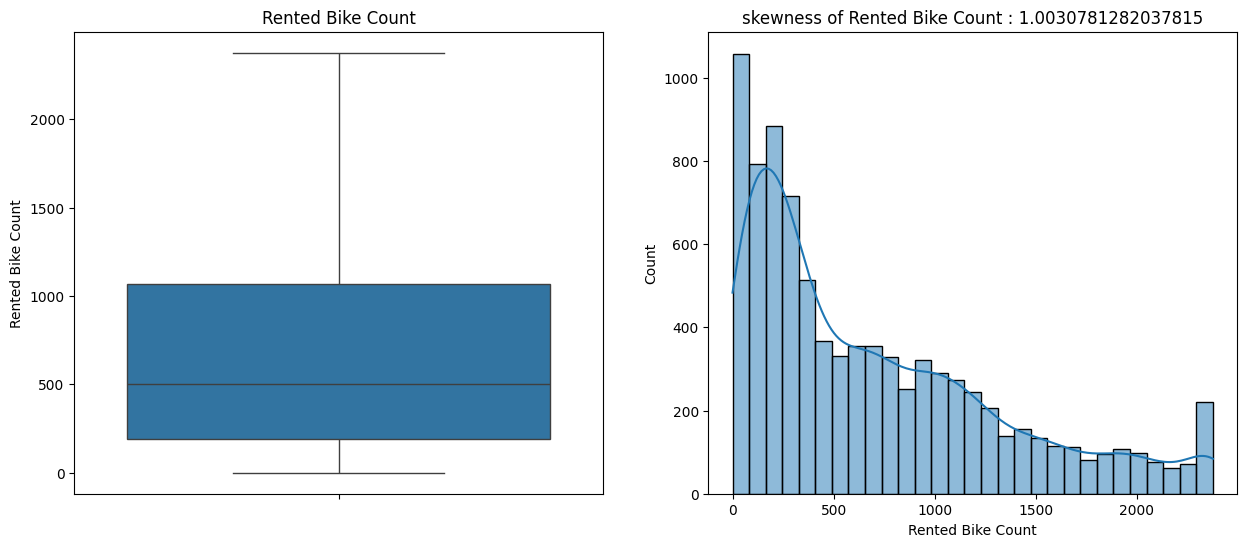

____________________________________________________________________________________________________


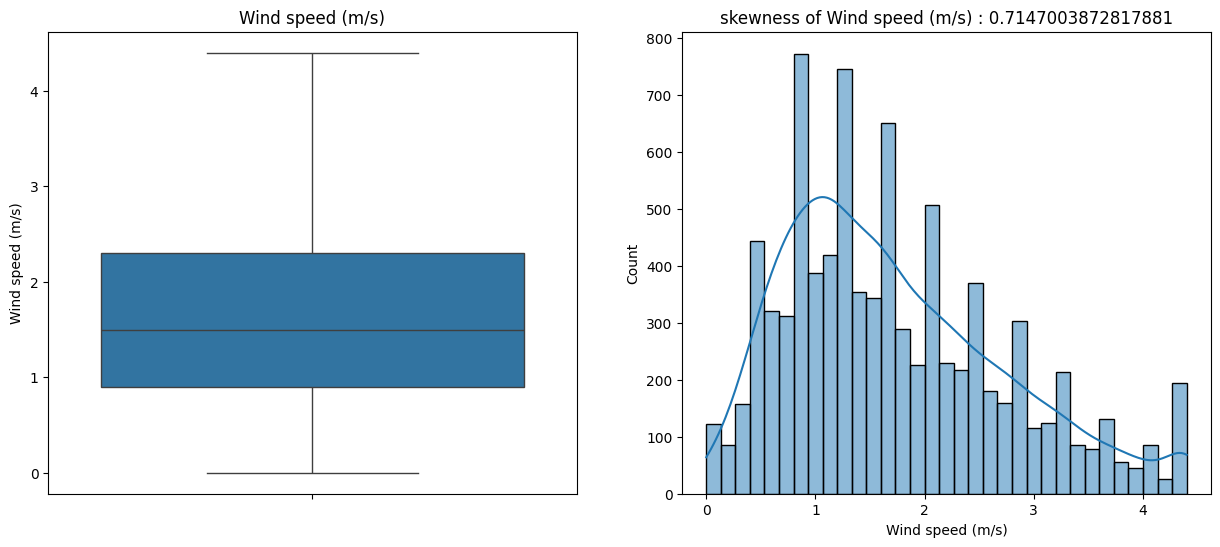

____________________________________________________________________________________________________


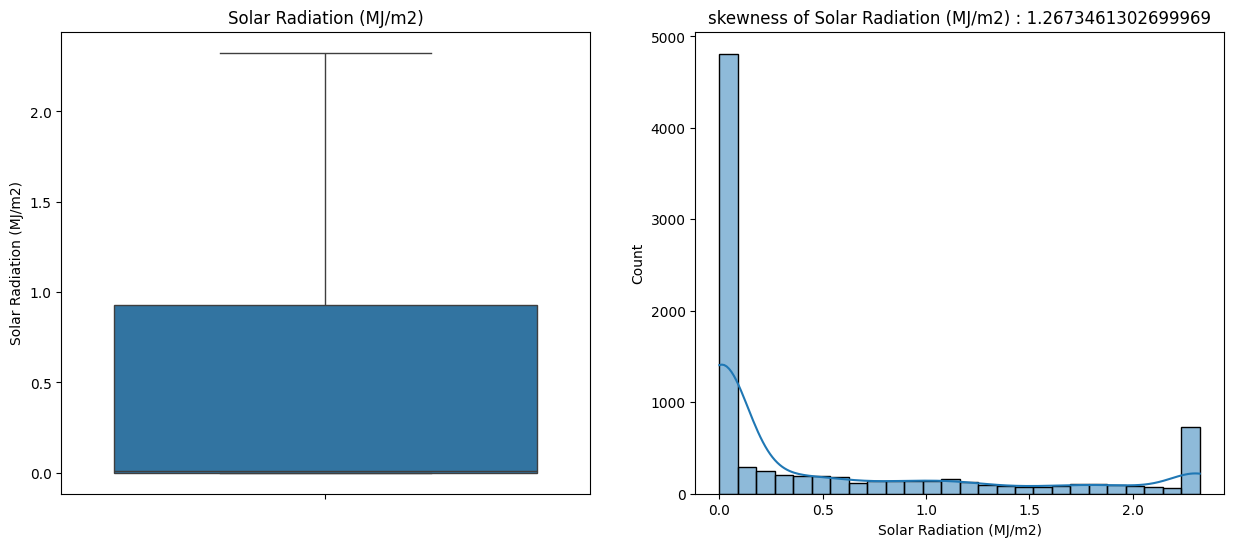

In [18]:
# Checking outliers for after removing it

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.histplot(bike_df[var], kde = True)
    ax.set_title(f'skewness of {var} : {bike_df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [19]:
# Performing feature engineering on feature Date
# Values extracted from the datetime column.

bike_df['day'] = bike_df['Date'].dt.day
bike_df['month'] = bike_df['Date'].dt.month
bike_df['year'] = bike_df['Date'].dt.year

In [20]:
# Dropping original  Date feature after performing feature engineering
bike_df.drop(columns='Date', axis=1, inplace=True)


In the context of the drop function in Pandas, the axis parameter specifies whether you want to drop rows or columns:

`axis=0`: Drop rows (this is the default value).

`axis=1`: Drop columns

In [21]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
 12  Rented Bike Count          8760 non-null   int64  
 13  day                        8760 non-null   int32

The variables day, month, and year were created from the variable Date, and the original variables were deleted.

### **Univariate analysis**:
Univariate analysis is the simplest form of data analysis. It involves examining a single variable at a time to summarize and understand its characteristics. The main goal is to describe and find patterns within the variable. Here's a deeper dive into univariate analysis:

In [22]:
# Define excluded and target variables
excluded_variables = [var for var in bike_df.columns if len(bike_df[var].value_counts()) > 15]
target_variables = [var for var in bike_df.columns if var not in excluded_variables]

target_variables

['Seasons', 'Holiday', 'Functioning Day', 'month', 'year']

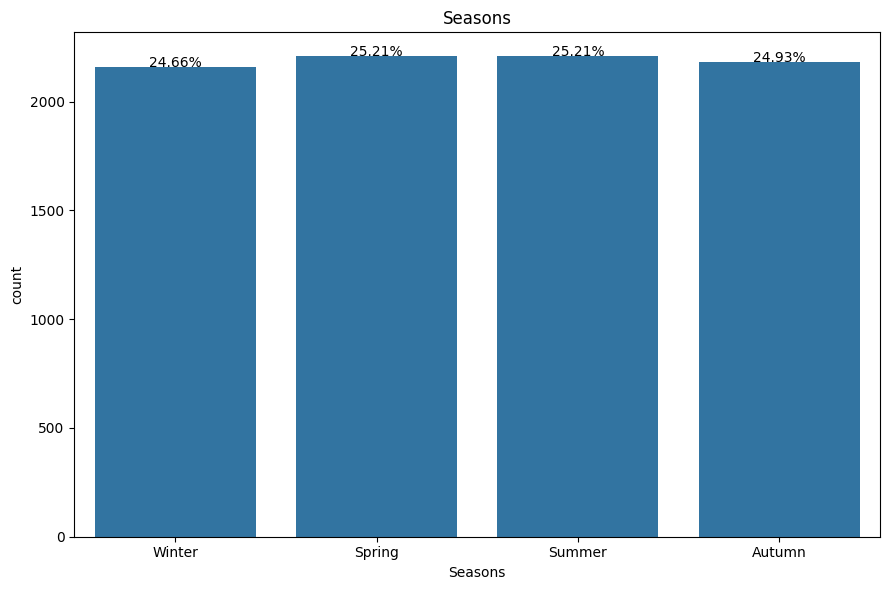

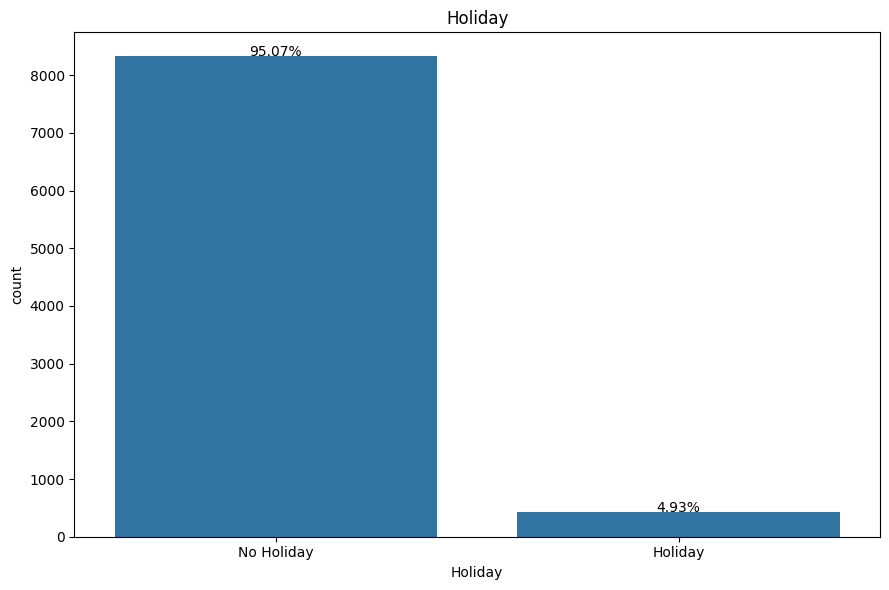

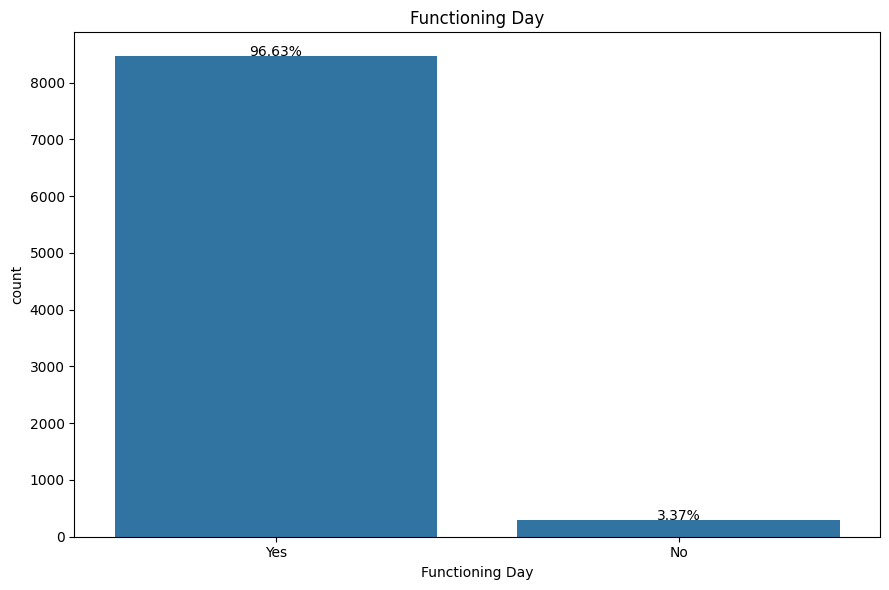

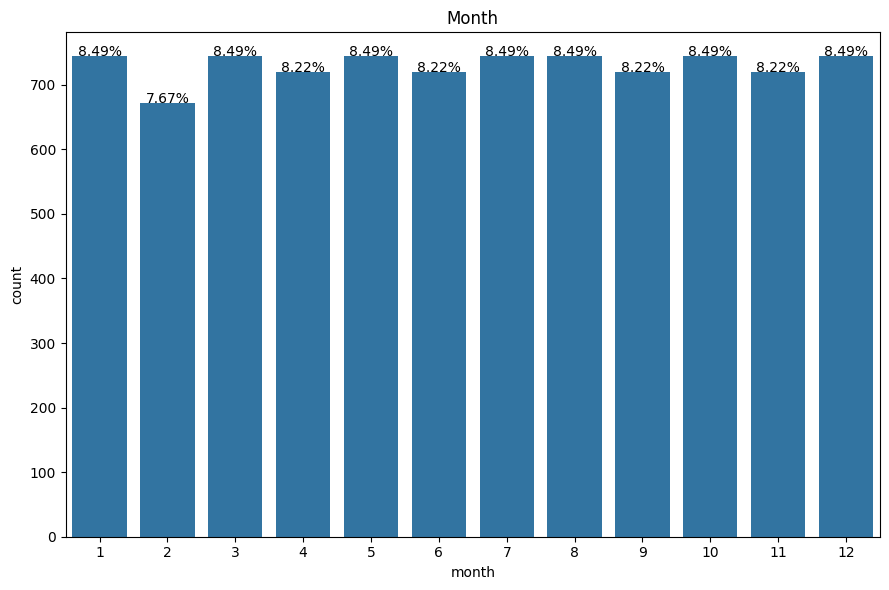

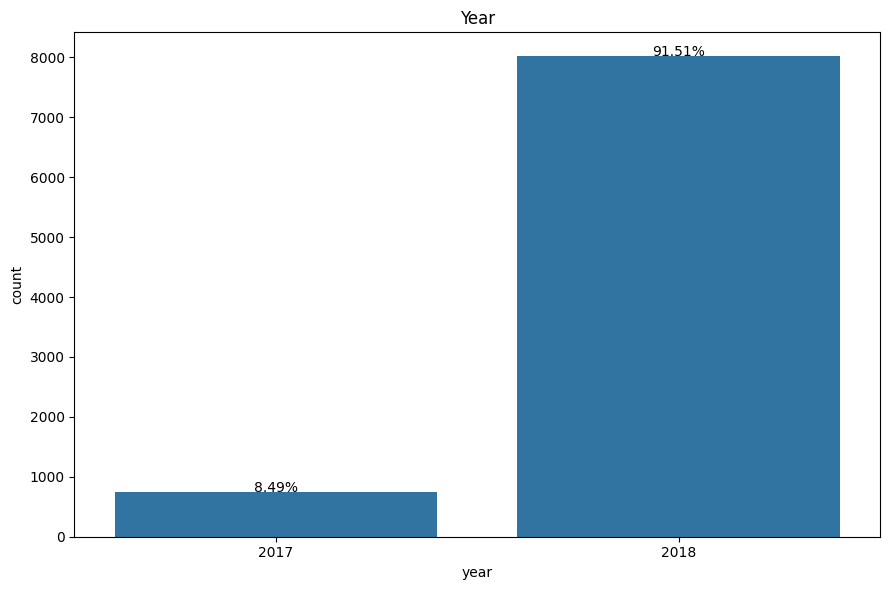

In [23]:
# Function to annotate percent on bars taken from AI tool
def annot_percent(ax):
    total = len(bike_df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

# Plot count plots for each target variable in separate figures
for var in target_variables:
    plt.figure(figsize=(9, 6))
    ax = sns.countplot(x=bike_df[var])
    ax.set_title(var.title())
    annot_percent(ax)
    plt.tight_layout()
    plt.show()


Observations :

1. Customers favour rental motorcycles equally in all seasons.
2. When there are no holidays, customers choose to rent motorcycles. Customers 3. hardly ever use the bikes they rent while traveling on holiday.
3. Nearly all consumers preferred to rent bikes during functional hours.
4. Bicycle rentals are popular all month long.
5. Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.

### **Bivariate Analysis**:
Bivariate analysis is a statistical method used to examine the relationship between two variables. It's a fundamental tool in data analysis that helps understand how one variable might influence or be related to another. The main goals of bivariate analysis are to explore patterns, determine correlations, and test hypotheses about the relationship between the two variables.

We are going to use these numerical varibles:

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
        'Rented Bike Count', 'day', 'month']

#### **1. Line Plot**

A line plot is a type of graph used to display data points connected by straight lines. It is particularly useful for visualizing trends over time or continuous data.

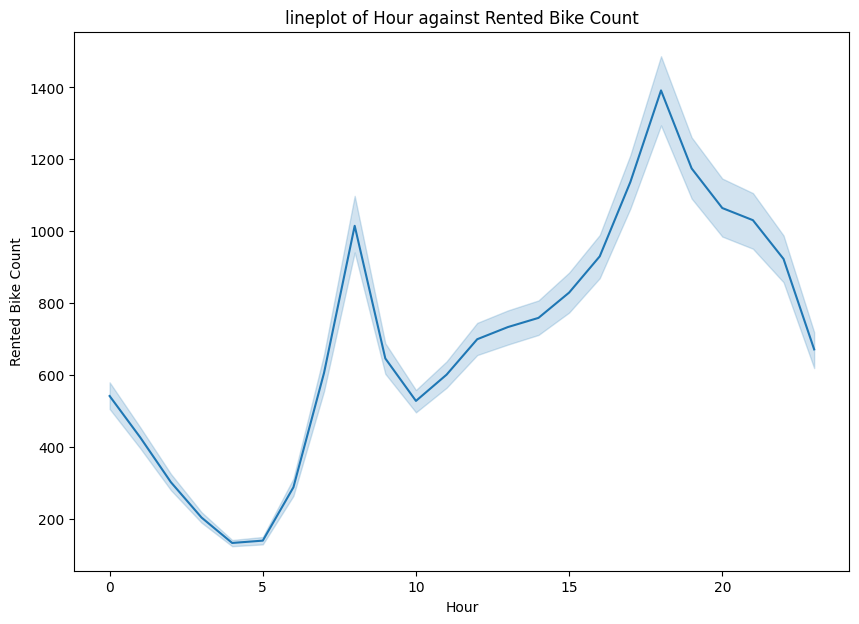

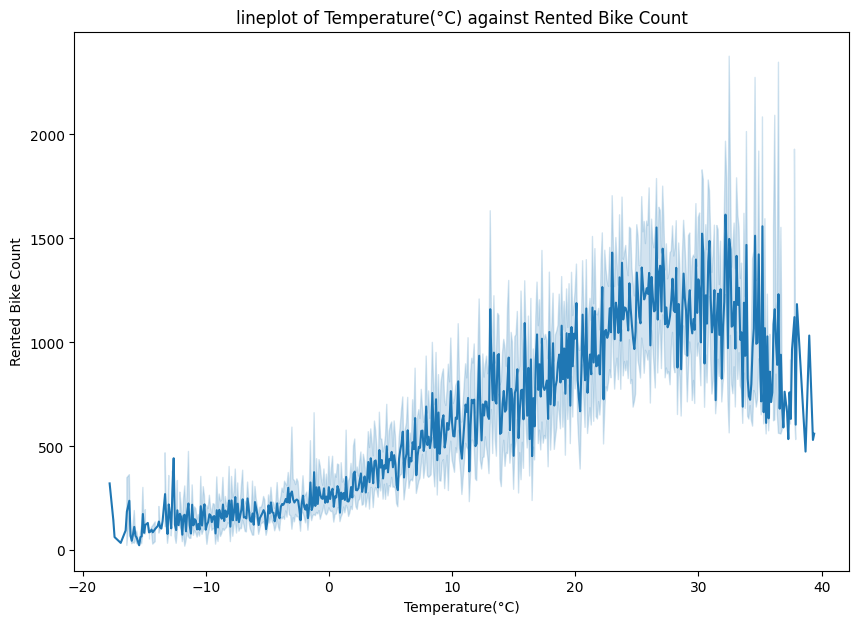

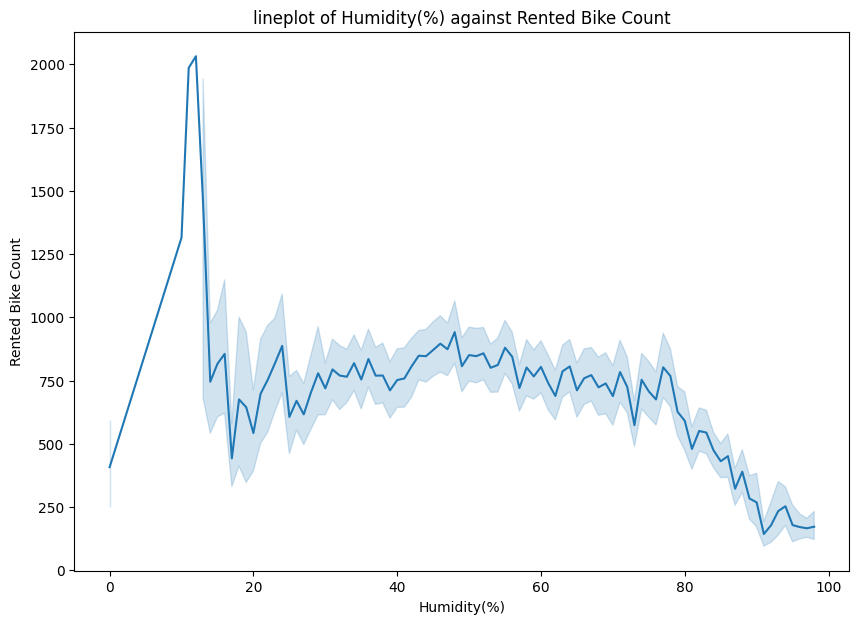

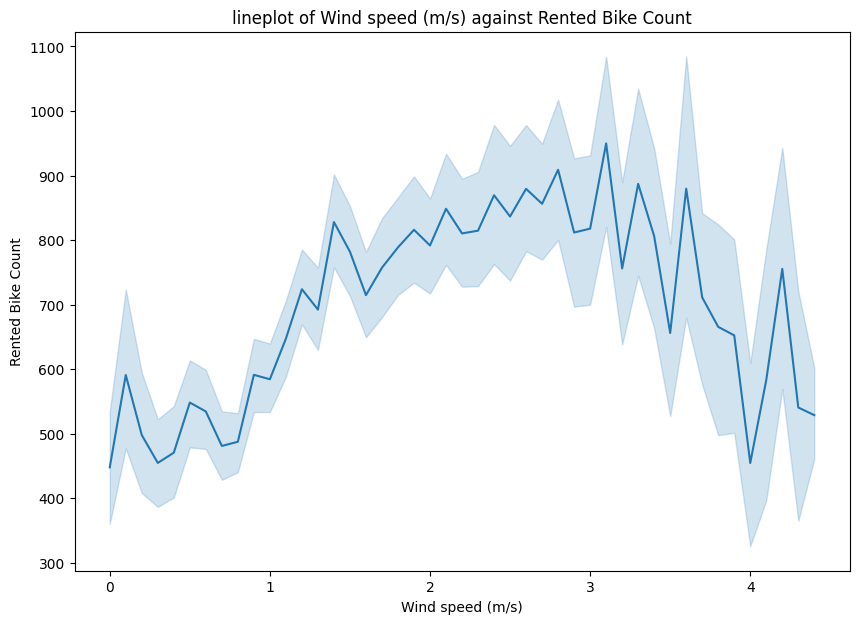

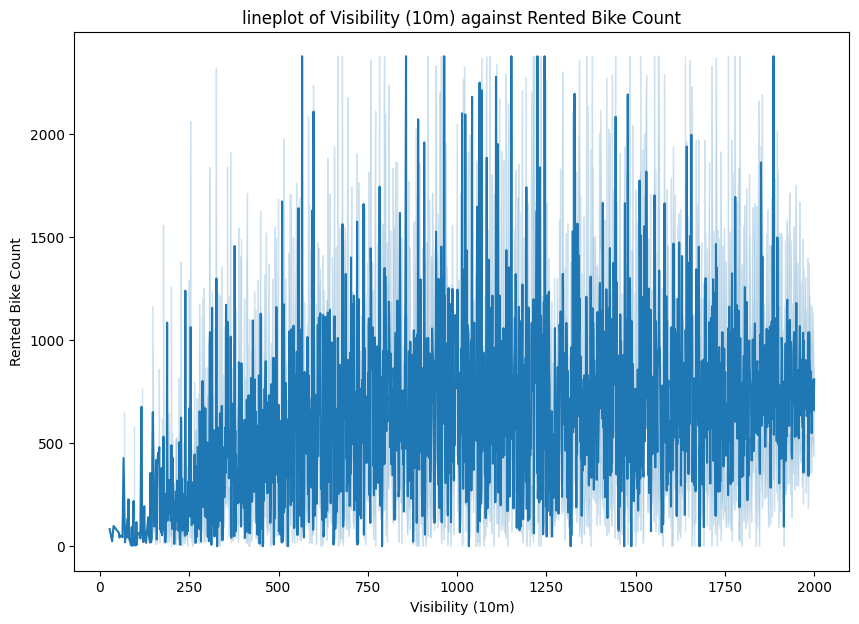

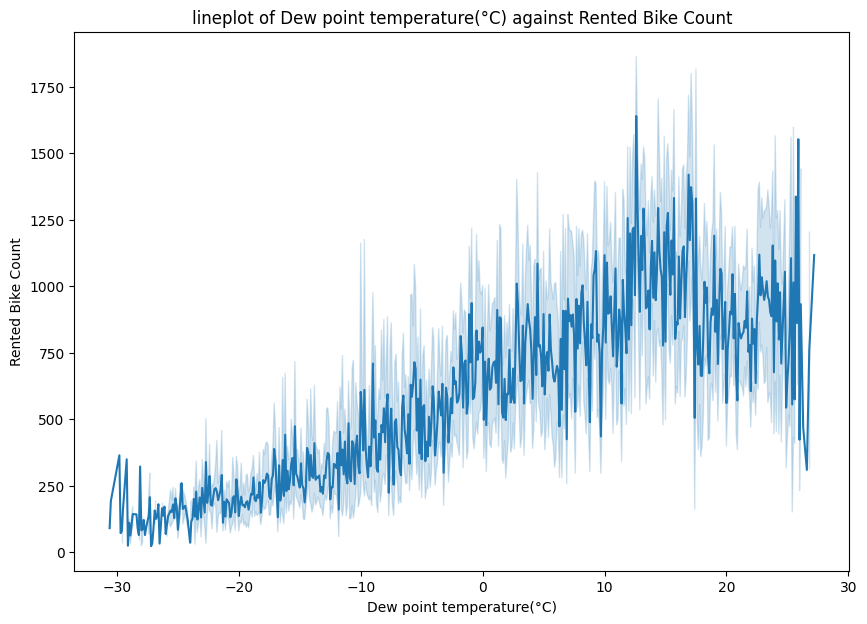

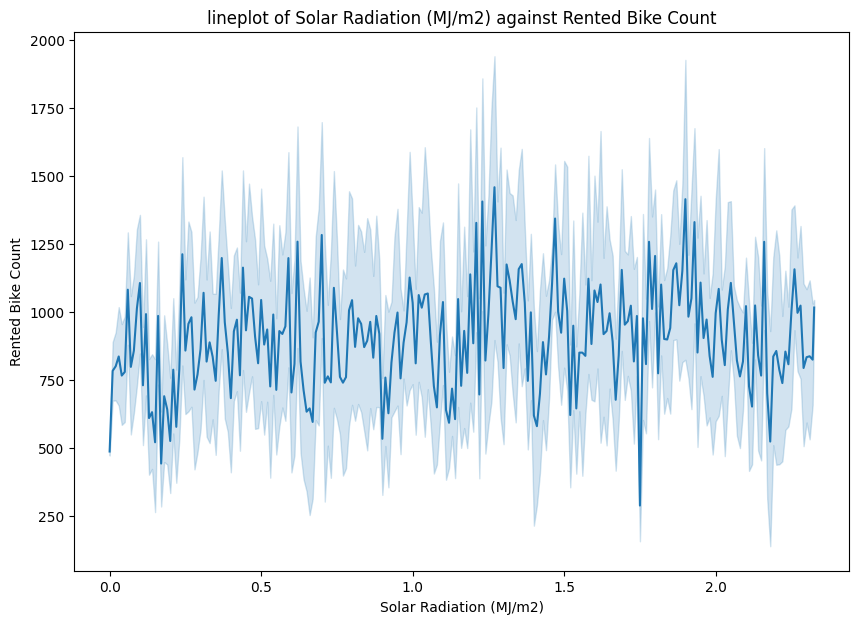

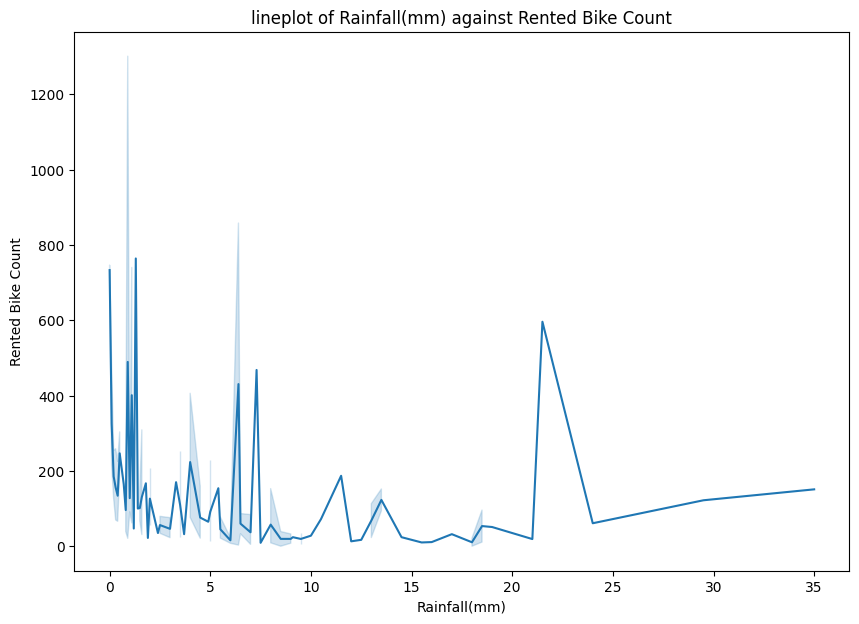

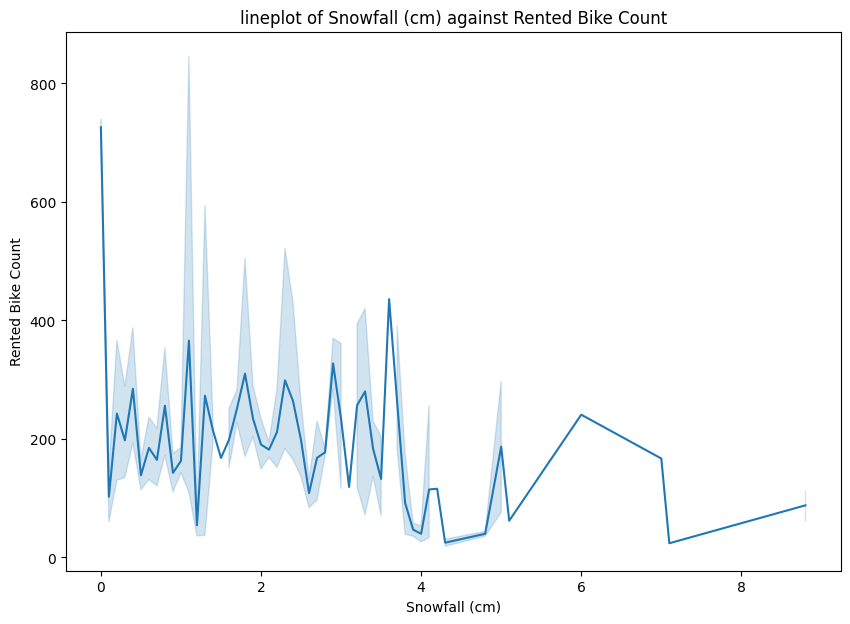

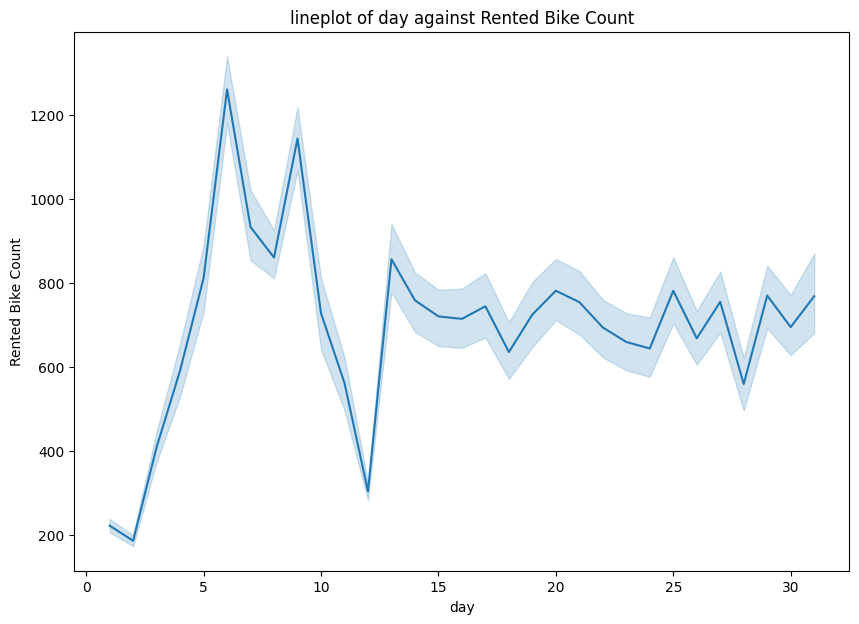

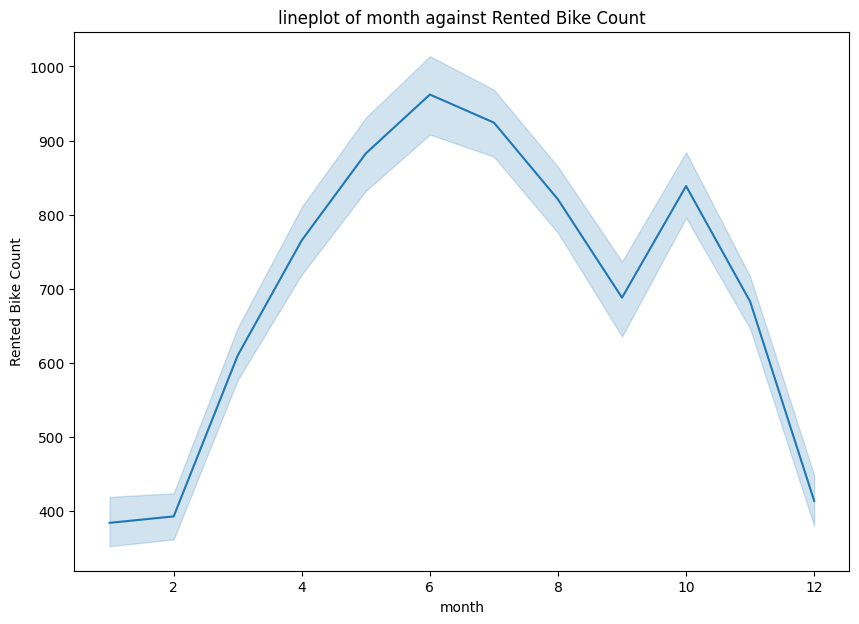

In [24]:
# Checking effect of each variable on use of rented bike
target_variables=[var for var in bike_df.columns if var not in ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(10,7))
    ax=sns.lineplot(x=bike_df[var], y=bike_df["Rented Bike Count"],data=bike_df)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

Obsevations :

1. Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.
2. When the humidity level is between 10% and 18%, people prefer to rent bikes.
3. When wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.
4. Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.
5. According to the graph, solar radiation has no effect on customer use of rented bikes.
6. When it's not raining, people prefer rental bikes the most.
7. When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.
8. In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.
9. In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

#### **Barplot**

A bar plot, also known as a bar chart, is a visual representation used to display and compare the frequency, count, or other measures of categorical data.

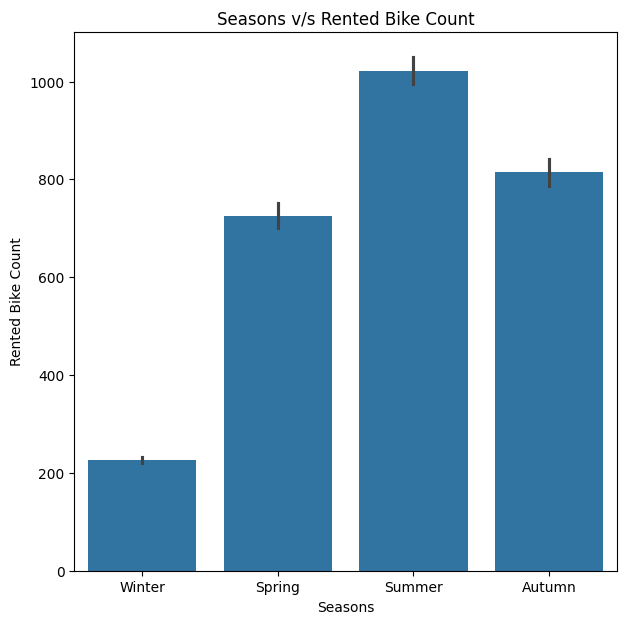

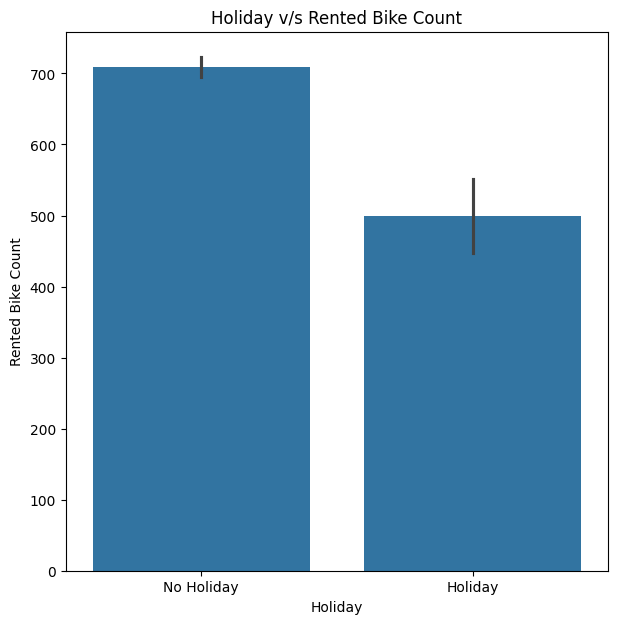

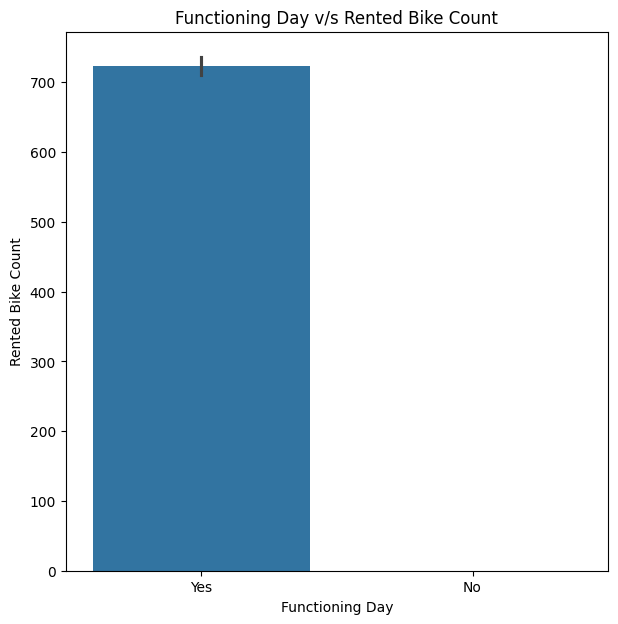

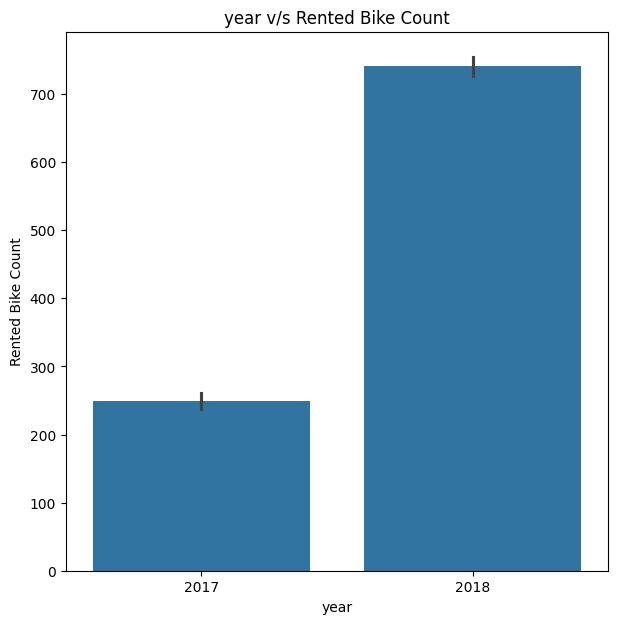

In [32]:
# Plotting bar plot for variables

# Defining target variables
target=[]

for var in bike_df.columns :
  if var in ['Seasons', 'Holiday', 'Functioning Day', 'year']:
    target.append(var)

for var in target:
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=bike_df[var], y='Rented Bike Count', data=bike_df)
    ax.set_title(f'{var} v/s Rented Bike Count')
    plt.show()

Observations :

1. During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.
2. Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.
3. Almost every rented bike is used during its functional hours.
4. The use of rented bikes increased by three times in 2018 compared to 2017.